## Lead Score Case Study

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

### Step 1: Importing and Merging Data

In [1]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
pd.options.display.max_rows = 999
from sklearn.linear_model import LinearRegression

In [2]:
# Importing Leads datasets
Leads_data = pd.read_csv("Leads.csv")
Leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#Total observation of Leads file
Leads_data.shape

(9240, 37)

In [4]:
# Checking all information about columns
Leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
#Checking the statistical data 
Leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
#Checking the NAN count in all columns
Leads_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
# Checking the percentage of missing values
round(100*(Leads_data.isnull().sum()/len(Leads_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [8]:
# Converting all the values to lower case
Leads_data = Leads_data.applymap(lambda s:s.lower() if type(s) == str else s)

In [9]:
# Replace "select" with "NAN"
Leads_data = Leads_data.replace('select',np.nan)

In [10]:
# Checking the percentage of missing values
round(100*(Leads_data.isnull().sum()/len(Leads_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### Drop the columns which are having high percentage of missing value and ID's columns

In [11]:
Leads_data.drop(["Asymmetrique Activity Index","Asymmetrique Profile Index",
                 "Asymmetrique Activity Score","Asymmetrique Profile Score", "Lead Quality", 
                 "Tags", "How did you hear about X Education",
                "What matters most to you in choosing a course","Lead Profile",
                 "Receive More Updates About Our Courses","Update me on Supply Chain Content",
                "Get updates on DM Content","I agree to pay the amount through cheque","Prospect ID","City",
                 "Magazine","Lead Number"],axis=1, inplace=True)

In [12]:
# Checking the total row and columns after droping the columns
Leads_data.shape

(9240, 20)

In [13]:
# filled "NAN" with "not provided" value because categories was not selected by customers
Leads_data['Specialization'] = Leads_data['Specialization'].fillna('not provided') 
Leads_data['Country'] = Leads_data['Country'].fillna('not provided')
Leads_data['What is your current occupation'] = Leads_data['What is your current occupation'].fillna('not provided')
Leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Do Not Call                             9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9137 non-null   object 
 9   Country                                 9240 non-null   object 
 10  Specialization                          9240 non-null   obje

In [14]:
# Checking the percentage of missing values
round(100*(Leads_data.isnull().sum()/len(Leads_data.index)), 2)

Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
Country                                   0.00
Specialization                            0.00
What is your current occupation           0.00
Search                                    0.00
Newspaper Article                         0.00
X Education Forums                        0.00
Newspaper                                 0.00
Digital Advertisement                     0.00
Through Recommendations                   0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [15]:
Leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Do Not Call                             9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9137 non-null   object 
 9   Country                                 9240 non-null   object 
 10  Specialization                          9240 non-null   obje

In [16]:
#Checking the NAN count
Leads_data.isnull().sum()

Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                               137
Total Time Spent on Website                 0
Page Views Per Visit                      137
Last Activity                             103
Country                                     0
Specialization                              0
What is your current occupation             0
Search                                      0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

#### Checking the missing valuse and manipulate them

In [17]:
Leads_data["Lead Source"].value_counts()

google               2873
direct traffic       2543
olark chat           1755
organic search       1154
reference             534
welingak website      142
referral sites        125
facebook               55
bing                    6
click2call              4
social media            2
live chat               2
press_release           2
pay per click ads       1
blog                    1
welearn                 1
welearnblog_home        1
youtubechannel          1
testone                 1
nc_edm                  1
Name: Lead Source, dtype: int64

In [18]:
# replace "NAN" with most used source
Leads_data["Lead Source"].fillna(Leads_data["Lead Source"].mode()[0],inplace=True)

In [19]:
# Check the counts
Leads_data["Lead Source"].value_counts()

google               2909
direct traffic       2543
olark chat           1755
organic search       1154
reference             534
welingak website      142
referral sites        125
facebook               55
bing                    6
click2call              4
social media            2
live chat               2
press_release           2
pay per click ads       1
blog                    1
welearn                 1
welearnblog_home        1
youtubechannel          1
testone                 1
nc_edm                  1
Name: Lead Source, dtype: int64

In [20]:
# Replacing the "NAN" with 0 or most used category
Leads_data["TotalVisits"].fillna(0,inplace=True)
Leads_data["Page Views Per Visit"].fillna(0,inplace=True)
Leads_data["Last Activity"].fillna(Leads_data["Last Activity"].mode()[0],inplace=True)

In [21]:
# Cheking the missing value after manipulated the missing data 
Leads_data.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Country                                   0
Specialization                            0
What is your current occupation           0
Search                                    0
Newspaper Article                         0
X Education Forums                        0
Newspaper                                 0
Digital Advertisement                     0
Through Recommendations                   0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [22]:
#Checking the info for all columns
Leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Do Not Call                             9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9240 non-null   float64
 8   Last Activity                           9240 non-null   object 
 9   Country                                 9240 non-null   object 
 10  Specialization                          9240 non-null   obje

#### Checking the number of unique categories in each categorical columns

In [23]:
Leads_data["Lead Origin"].value_counts()

landing page submission    4886
api                        3580
lead add form               718
lead import                  55
quick add form                1
Name: Lead Origin, dtype: int64

In [24]:
Leads_data["Lead Source"].value_counts()

google               2909
direct traffic       2543
olark chat           1755
organic search       1154
reference             534
welingak website      142
referral sites        125
facebook               55
bing                    6
click2call              4
social media            2
live chat               2
press_release           2
pay per click ads       1
blog                    1
welearn                 1
welearnblog_home        1
youtubechannel          1
testone                 1
nc_edm                  1
Name: Lead Source, dtype: int64

In [25]:
# Merge the category which has very low counts
def ctg(x):
    category = ""
    if x in ["google","direct traffic","olark chat","organic search","reference","welingak website","referral sites","facebook"]:
        category = x
    else:
        category = "Other Source"
    return category

Leads_data["Lead Source"] = Leads_data.apply(lambda x:ctg(x["Lead Source"]), axis = 1)
Leads_data["Lead Source"].value_counts()

google              2909
direct traffic      2543
olark chat          1755
organic search      1154
reference            534
welingak website     142
referral sites       125
facebook              55
Other Source          23
Name: Lead Source, dtype: int64

In [26]:
Leads_data["Last Activity"].value_counts()

email opened                    3540
sms sent                        2745
olark chat conversation          973
page visited on website          640
converted to lead                428
email bounced                    326
email link clicked               267
form submitted on website        116
unreachable                       93
unsubscribed                      61
had a phone conversation          30
approached upfront                 9
view in browser link clicked       6
email received                     2
email marked spam                  2
visited booth in tradeshow         1
resubscribed to emails             1
Name: Last Activity, dtype: int64

In [27]:
# Merge the category which has very low counts
def ctg(x):
    category = ""
    if x in ["approached upfront","view in browser link clicked","email received","email marked spam","visited booth in tradeshow","visited booth in tradeshow","resubscribed to emails"]:
        category = "Others"
    else:
        category = x
    return category

Leads_data["Last Activity"] = Leads_data.apply(lambda x:ctg(x["Last Activity"]), axis = 1)
Leads_data["Last Activity"].value_counts()

email opened                 3540
sms sent                     2745
olark chat conversation       973
page visited on website       640
converted to lead             428
email bounced                 326
email link clicked            267
form submitted on website     116
unreachable                    93
unsubscribed                   61
had a phone conversation       30
Others                         21
Name: Last Activity, dtype: int64

In [28]:
Leads_data["Country"].value_counts()

india                   6492
not provided            2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switzerland   

In [29]:
# Merge the category which has very low counts
def ctg(x):
    category = ""
    if x in ["india","not provided"]:
        category = x
    else:
        category = "Outside India"
    return category

Leads_data["Country"] = Leads_data.apply(lambda x:ctg(x["Country"]), axis = 1)
Leads_data["Country"].value_counts()

india            6492
not provided     2461
Outside India     287
Name: Country, dtype: int64

In [30]:
Leads_data["Specialization"].value_counts()

not provided                         3380
finance management                    976
human resource management             848
marketing management                  838
operations management                 503
business administration               403
it projects management                366
supply chain management               349
banking, investment and insurance     338
travel and tourism                    203
media and advertising                 203
international business                178
healthcare management                 159
hospitality management                114
e-commerce                            112
retail management                     100
rural and agribusiness                 73
e-business                             57
services excellence                    40
Name: Specialization, dtype: int64

In [31]:
Leads_data["What is your current occupation"].value_counts()

unemployed              5600
not provided            2690
working professional     706
student                  210
other                     16
housewife                 10
businessman                8
Name: What is your current occupation, dtype: int64

In [32]:
Leads_data["Last Notable Activity"].value_counts()

modified                        3407
email opened                    2827
sms sent                        2172
page visited on website          318
olark chat conversation          183
email link clicked               173
email bounced                     60
unsubscribed                      47
unreachable                       32
had a phone conversation          14
email marked spam                  2
approached upfront                 1
resubscribed to emails             1
view in browser link clicked       1
form submitted on website          1
email received                     1
Name: Last Notable Activity, dtype: int64

In [33]:
# Merge the category which has very low counts
def ctg(x):
    category = ""
    if x in ["email received","form submitted on website","view in browser link clicked","resubscribed to emails","approached upfront","email marked spam"]:
        category = "Others"
    else:
        category = x
    return category

Leads_data["Last Notable Activity"] = Leads_data.apply(lambda x:ctg(x["Last Notable Activity"]), axis = 1)
Leads_data["Last Notable Activity"].value_counts()

modified                    3407
email opened                2827
sms sent                    2172
page visited on website      318
olark chat conversation      183
email link clicked           173
email bounced                 60
unsubscribed                  47
unreachable                   32
had a phone conversation      14
Others                         7
Name: Last Notable Activity, dtype: int64

In [34]:
# Cheking total number of row and columns
Leads_data.shape

(9240, 20)

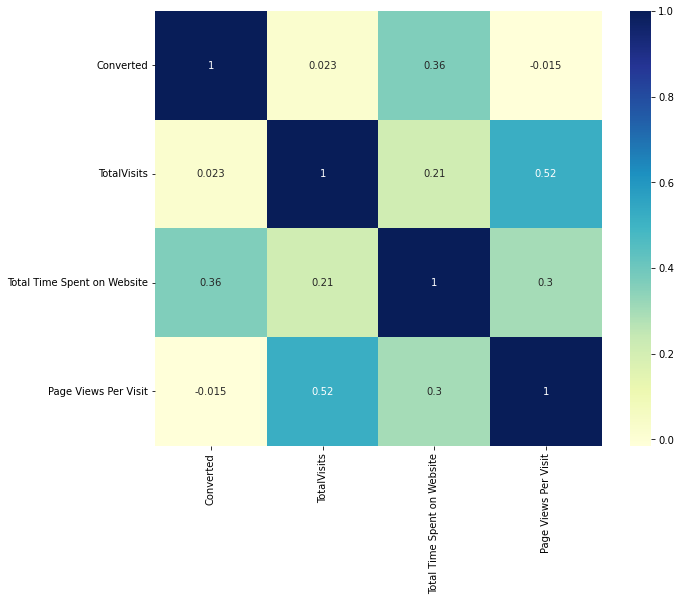

In [35]:
# Checking the corelation between the columns
plt.figure(figsize=(10,8))
sns.heatmap(Leads_data.corr(),cmap="YlGnBu",annot=True)
plt.show()

In [36]:
Leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,not provided,not provided,unemployed,no,no,no,no,no,no,no,modified
1,api,organic search,no,no,0,5.0,674,2.5,email opened,india,not provided,unemployed,no,no,no,no,no,no,no,email opened
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,business administration,student,no,no,no,no,no,no,yes,email opened
3,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,media and advertising,unemployed,no,no,no,no,no,no,no,modified
4,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,not provided,unemployed,no,no,no,no,no,no,no,modified


In [37]:
# List of variables to map

varlist =  ['Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums',
            'Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview'
]

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
Leads_data[varlist] = Leads_data[varlist].apply(binary_map)

In [38]:
Leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,0,0,0,0.0,0,0.0,page visited on website,not provided,not provided,unemployed,0,0,0,0,0,0,0,modified
1,api,organic search,0,0,0,5.0,674,2.5,email opened,india,not provided,unemployed,0,0,0,0,0,0,0,email opened
2,landing page submission,direct traffic,0,0,1,2.0,1532,2.0,email opened,india,business administration,student,0,0,0,0,0,0,1,email opened
3,landing page submission,direct traffic,0,0,0,1.0,305,1.0,unreachable,india,media and advertising,unemployed,0,0,0,0,0,0,0,modified
4,landing page submission,google,0,0,1,2.0,1428,1.0,converted to lead,india,not provided,unemployed,0,0,0,0,0,0,0,modified


In [39]:
#Checking the category in "Do Not Email" columns
Leads_data["Do Not Email"].value_counts()

0    8506
1     734
Name: Do Not Email, dtype: int64

## EDA

#### Univariate analysis

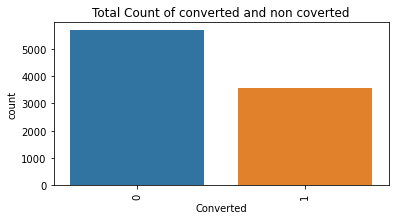

In [40]:
plt.figure(figsize=[6,3])
sns.countplot(Leads_data.Converted)
plt.xticks(rotation=90)
plt.title("Total Count of converted and non coverted")
plt.show()

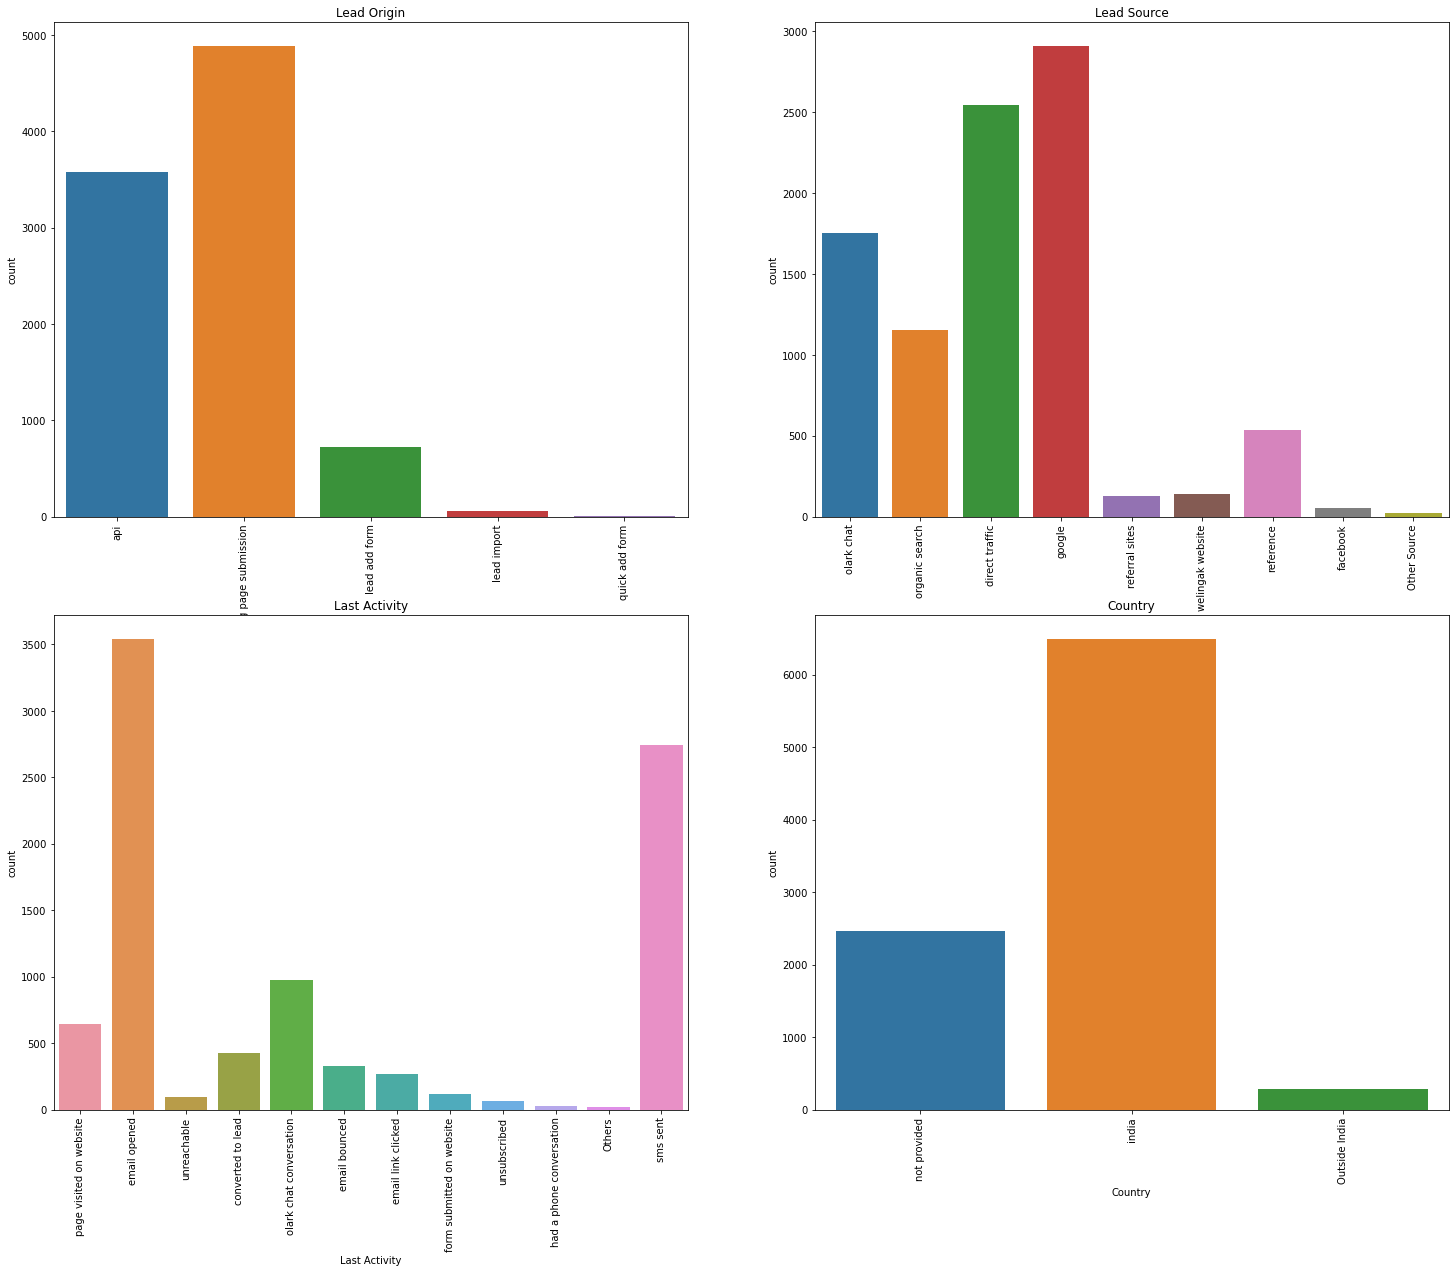

In [41]:
plt.figure(figsize = (25,20))
plt.subplot(2,2,1)
sns.countplot(Leads_data['Lead Origin']).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')
plt.subplot(2,2,2)
sns.countplot(Leads_data['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.subplot(2,2,3)
sns.countplot(Leads_data['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.subplot(2,2,4)
sns.countplot(Leads_data['Country']).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

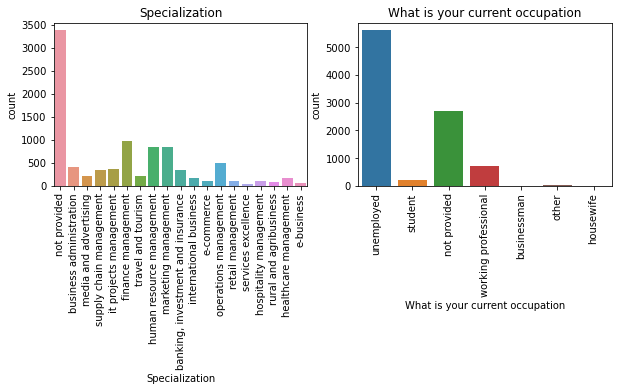

In [42]:
plt.figure(figsize = (10,3))
plt.subplot(1,2,1)
sns.countplot(Leads_data['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(1,2,2)
sns.countplot(Leads_data['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')

plt.show()

Text(0.5, 1.0, 'Last Notable Activity')

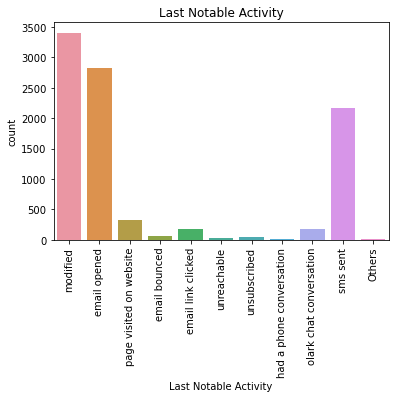

In [43]:
sns.countplot(Leads_data['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

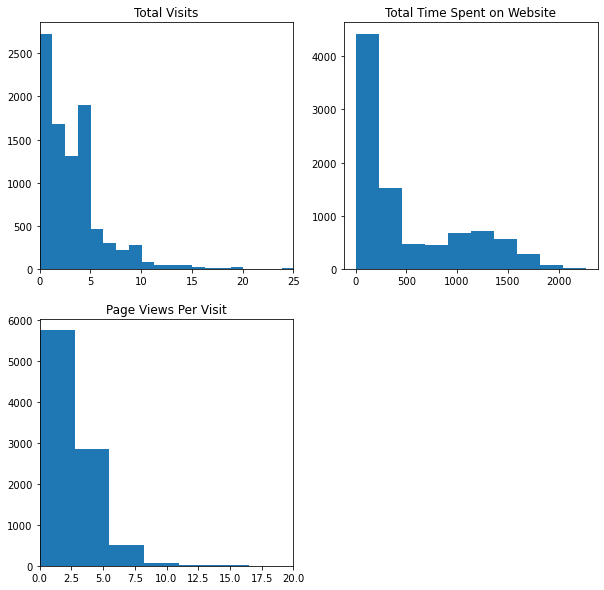

In [44]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.hist(Leads_data['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(2,2,2)
plt.hist(Leads_data['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(2,2,3)
plt.hist(Leads_data['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

### Bivariate analysis

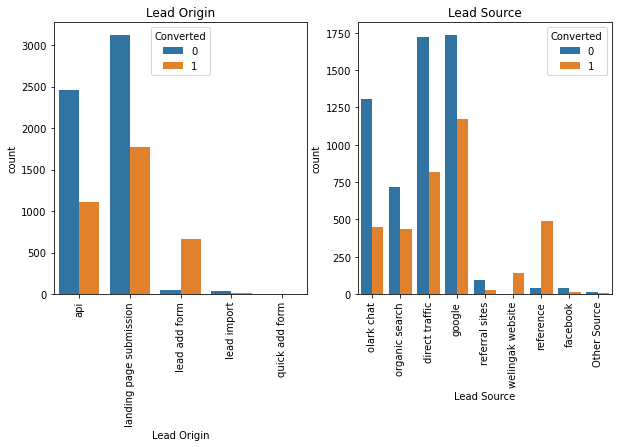

In [45]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= Leads_data).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= Leads_data).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')

plt.show()


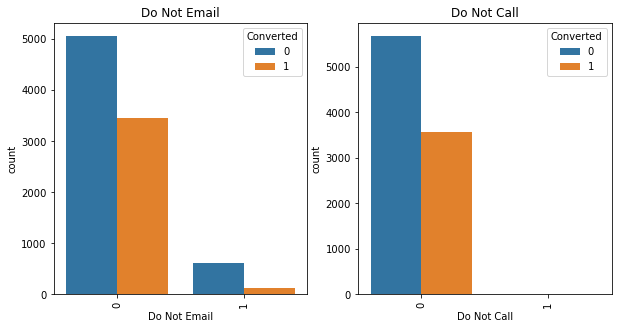

In [46]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= Leads_data).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= Leads_data).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

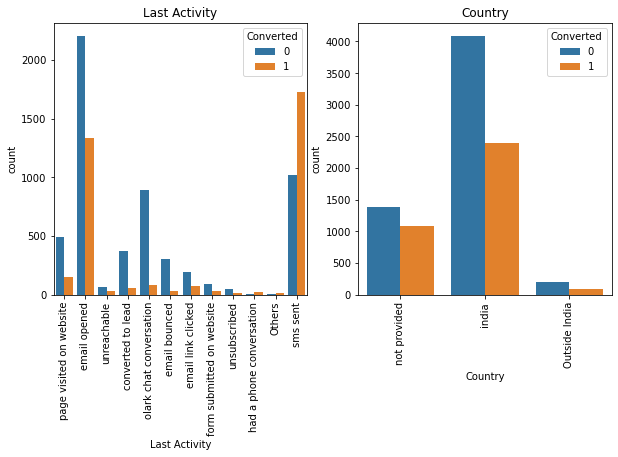

In [47]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= Leads_data).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= Leads_data).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

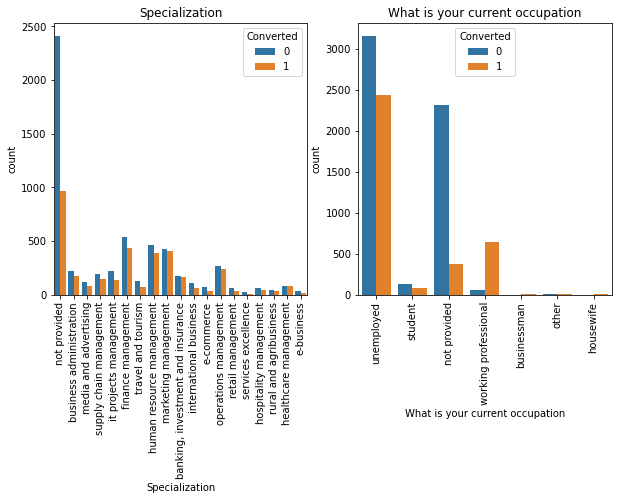

In [48]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= Leads_data).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= Leads_data).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

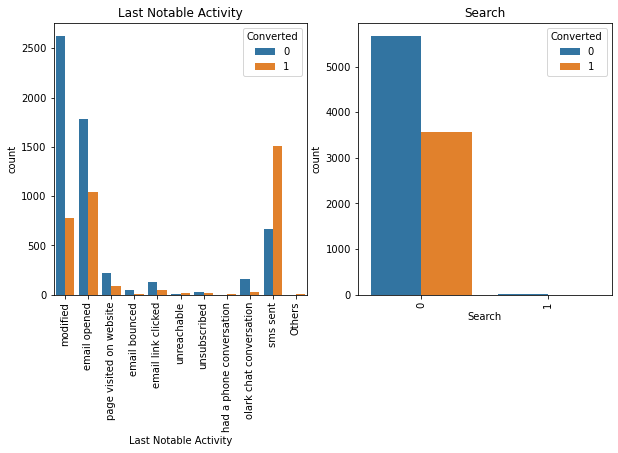

In [49]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Notable Activity', hue='Converted', data= Leads_data).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= Leads_data).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

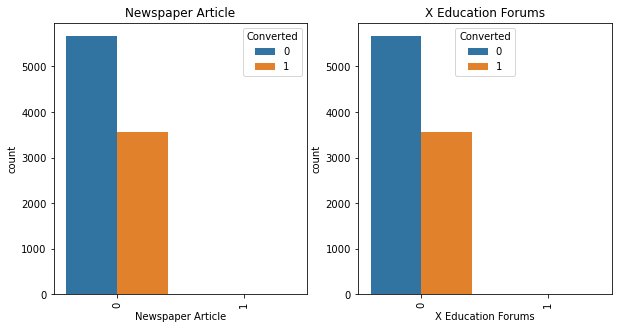

In [50]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= Leads_data).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= Leads_data).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

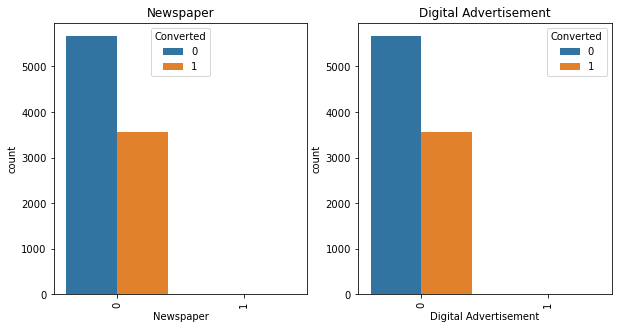

In [51]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= Leads_data).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= Leads_data).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

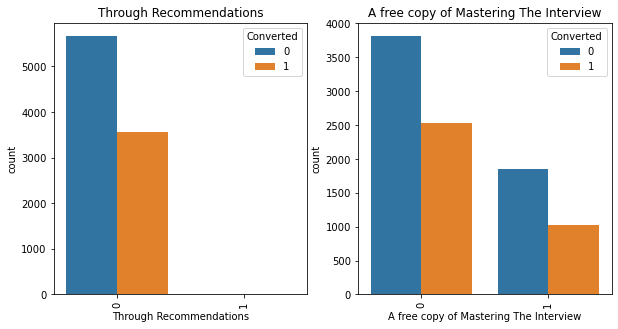

In [52]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= Leads_data).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= Leads_data).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

## Create Dummy variable

In [53]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(Leads_data[["Lead Origin","Lead Source","Last Activity","Country","Specialization","What is your current occupation",
        "Last Notable Activity"]], drop_first=True)

 #Adding the results to the master dataframe
Leads_data = pd.concat([Leads_data, dummy1], axis=1)

In [54]:
Leads_data.shape

(9240, 79)

In [55]:
# We have created dummies for the below variables, so we can drop them
Leads_data = Leads_data.drop(["Lead Origin","Lead Source","Last Activity","Country","Specialization","Specialization_not provided","What is your current occupation",
        "Last Notable Activity","What is your current occupation_not provided","Country_not provided"], 1)

In [58]:
# Checking for outliers in the continuous variables
num_Leads_data = Leads_data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [59]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_Leads_data.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.394156,487.698268,2.327787
std,4.836682,548.021466,2.164258
min,0.000000,0.000000,0.000000
25%,0.000000,12.000000,0.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


From the distribution shown above, you can see that there no outliers in your data. The numbers are gradually increasing.

# Train-Test Split & Logistic Regression Model Building:

In [60]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = Leads_data['Converted']

y.head()

X=Leads_data.drop('Converted', axis=1)

In [61]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [62]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6468 entries, 1871 to 5640
Data columns (total 68 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6468 non-null   int64  
 1   Do Not Call                                           6468 non-null   int64  
 2   TotalVisits                                           6468 non-null   float64
 3   Total Time Spent on Website                           6468 non-null   int64  
 4   Page Views Per Visit                                  6468 non-null   float64
 5   Search                                                6468 non-null   int64  
 6   Newspaper Article                                     6468 non-null   int64  
 7   X Education Forums                                    6468 non-null   int64  
 8   Newspaper                                             6

In [63]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])


X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Notable Activity_email bounced,Last Notable Activity_email link clicked,Last Notable Activity_email opened,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed
1871,-0.291638,-0.017587,-0.645678,-0.885371,-1.062143,-0.041274,-0.017587,-0.012435,-0.012435,-0.021542,...,0,0,1,0,0,0,0,0,0,0
6795,-0.291638,-0.017587,0.109111,0.005716,-0.452487,-0.041274,-0.017587,-0.012435,-0.012435,-0.021542,...,0,0,1,0,0,0,0,0,0,0
3516,-0.291638,-0.017587,0.297808,-0.691418,0.083827,-0.041274,-0.017587,-0.012435,-0.012435,-0.021542,...,0,0,1,0,0,0,0,0,0,0
8105,-0.291638,-0.017587,0.297808,1.365219,1.229797,-0.041274,-0.017587,-0.012435,-0.012435,-0.021542,...,0,0,0,0,0,0,0,1,0,0
3934,-0.291638,-0.017587,-0.645678,-0.885371,-1.062143,-0.041274,-0.017587,-0.012435,-0.012435,-0.021542,...,0,0,0,0,1,0,0,0,0,0


# Model Building using Stats Model & RFE:

In [64]:
import statsmodels.api as sm

In [65]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
# Import RFE


In [66]:
from sklearn.feature_selection import RFE
# Running RFE with 15 variables as output
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [67]:
rfe.support_

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False,  True, False, False,  True, False,  True, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True,  True,  True, False, False, False,  True,  True,
       False, False, False,  True, False])

In [68]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 34),
 ('Do Not Call', False, 45),
 ('TotalVisits', False, 39),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 42),
 ('Search', False, 54),
 ('Newspaper Article', False, 44),
 ('X Education Forums', False, 49),
 ('Newspaper', False, 47),
 ('Digital Advertisement', False, 41),
 ('Through Recommendations', False, 51),
 ('A free copy of Mastering The Interview', False, 50),
 ('Lead Origin_landing page submission', False, 19),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 35),
 ('Lead Origin_quick add form', False, 38),
 ('Lead Source_direct traffic', True, 1),
 ('Lead Source_facebook', False, 4),
 ('Lead Source_google', False, 3),
 ('Lead Source_olark chat', False, 9),
 ('Lead Source_organic search', True, 1),
 ('Lead Source_reference', False, 37),
 ('Lead Source_referral sites', False, 2),
 ('Lead Source_welingak website', True, 1),
 ('Last Activity_converted to lead', False, 7),
 ('Last Activity_email bo

In [69]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_lead add form',
       'Lead Source_direct traffic', 'Lead Source_organic search',
       'Lead Source_welingak website', 'Last Activity_email bounced',
       'Last Activity_had a phone conversation', 'Last Activity_sms sent',
       'What is your current occupation_housewife',
       'What is your current occupation_student',
       'What is your current occupation_unemployed',
       'What is your current occupation_working professional',
       'Last Notable Activity_had a phone conversation',
       'Last Notable Activity_modified', 'Last Notable Activity_unreachable'],
      dtype='object')

In [70]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview',
       'Lead Origin_landing page submission', 'Lead Origin_lead import',
       'Lead Origin_quick add form', 'Lead Source_facebook',
       'Lead Source_google', 'Lead Source_olark chat', 'Lead Source_reference',
       'Lead Source_referral sites', 'Last Activity_converted to lead',
       'Last Activity_email link clicked', 'Last Activity_email opened',
       'Last Activity_form submitted on website',
       'Last Activity_olark chat conversation',
       'Last Activity_page visited on website', 'Last Activity_unreachable',
       'Last Activity_unsubscribed', 'Country_india',
       'Specialization_business administration', 'Specialization_e-business',
       'Specialization_e-commerce', 'Specialization_finance management',
   

In [71]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2672.4
Date:                Tue, 18 Oct 2022   Deviance:                       5344.8
Time:                        09:19:29   Pearson chi2:                 6.63e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5572      0.087    -17.815      0.000      -1.728      -1.386
Total Time Spent on Website                              0.9638      0.036     27.128      0.000       0.894       1.033
Lead Origin_lead add form                                2.9264      0.188     15.579      0.000       2.558       3.295
Lead Source_direct traffic                              -0.7043      0.082     -8.625      0.000      -0.864      -0.544
Lead Source_organic search                              -0.4821      0.106     -4.556      0.000      -0.689      -0.275
Lead Source_welingak website                             1.8464      0.742      2.488      0.013       0.392       3.301
Last Activity_email bounced                             -1.3722      0.295     -4.658      0.000      -1.950      -0.795
Last Activity_had a phone conversation                   1.0939      0.906      1.208      0.227      -0.681       2.869
Last Activity_sms sent                                   1.1817      0.073     16.137      0.000       1.038       1.325
What is your current occupation_housewife               23.7995    1.4e+04      0.002      0.999   -2.74e+04    2.74e+04
What is your current occupation_student                  1.2083      0.240      5.041      0.000       0.738       1.678
What is your current occupation_unemployed               1.0307      0.085     12.063      0.000       0.863       1.198
What is your current occupation_working professional     3.5798      0.198     18.123      0.000       3.193       3.967
Last Notable Activity_had a phone conversation           2.0212      1.431      1.413      0.158      -0.783       4.826
Last Notable Activity_modified                          -0.9006      0.079    -11.451      0.000      -1.055      -0.746
Last Notable Activity_unreachable                        1.6957      0.528      3.211      0.001       0.661       2.731
========================================================================================================================
"""

In [72]:
#dropping column with high p-value

col = col.drop('What is your current occupation_housewife',1)


In [73]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2683.9
Date:                Tue, 18 Oct 2022   Deviance:                       5367.7
Time:                        09:19:30   Pearson chi2:                 6.67e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5257      0.086    -17.641      0.000      -1.695      -1.356
Total Time Spent on Website                              0.9638      0.035     27.184      0.000       0.894       1.033
Lead Origin_lead add form                                2.9798      0.188     15.874      0.000       2.612       3.348
Lead Source_direct traffic                              -0.7018      0.081     -8.614      0.000      -0.861      -0.542
Lead Source_organic search                              -0.4756      0.106     -4.505      0.000      -0.682      -0.269
Lead Source_welingak website                             1.7971      0.742      2.421      0.015       0.343       3.252
Last Activity_email bounced                             -1.3868      0.295     -4.698      0.000      -1.965      -0.808
Last Activity_had a phone conversation                   1.0780      0.906      1.190      0.234      -0.698       2.854
Last Activity_sms sent                                   1.1721      0.073     16.031      0.000       1.029       1.315
What is your current occupation_student                  1.1733      0.240      4.898      0.000       0.704       1.643
What is your current occupation_unemployed               0.9986      0.085     11.809      0.000       0.833       1.164
What is your current occupation_working professional     3.5465      0.197     17.989      0.000       3.160       3.933
Last Notable Activity_had a phone conversation           2.0290      1.431      1.418      0.156      -0.775       4.833
Last Notable Activity_modified                          -0.8990      0.078    -11.464      0.000      -1.053      -0.745
Last Notable Activity_unreachable                        1.6797      0.527      3.187      0.001       0.647       2.713
========================================================================================================================
"""

In [74]:
#dropping column with high p-value

col = col.drop('Last Activity_had a phone conversation',1)


In [75]:
col = col.drop('Last Notable Activity_had a phone conversation',1)

In [76]:
#col = col.drop('Lead Origin_lead import',1)

In [77]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2690.8
Date:                Tue, 18 Oct 2022   Deviance:                       5381.6
Time:                        09:19:30   Pearson chi2:                 6.51e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5160      0.086    -17.570      0.000      -1.685      -1.347
Total Time Spent on Website                              0.9631      0.035     27.214      0.000       0.894       1.032
Lead Origin_lead add form                                2.9789      0.188     15.873      0.000       2.611       3.347
Lead Source_direct traffic                              -0.7047      0.081     -8.660      0.000      -0.864      -0.545
Lead Source_organic search                              -0.4728      0.105     -4.487      0.000      -0.679      -0.266
Lead Source_welingak website                             1.7901      0.742      2.412      0.016       0.336       3.245
Last Activity_email bounced                             -1.3964      0.295     -4.731      0.000      -1.975      -0.818
Last Activity_sms sent                                   1.1609      0.073     15.901      0.000       1.018       1.304
What is your current occupation_student                  1.1672      0.239      4.875      0.000       0.698       1.636
What is your current occupation_unemployed               1.0019      0.084     11.865      0.000       0.836       1.167
What is your current occupation_working professional     3.5536      0.197     18.048      0.000       3.168       3.940
Last Notable Activity_modified                          -0.9015      0.078    -11.535      0.000      -1.055      -0.748
Last Notable Activity_unreachable                        1.6681      0.527      3.164      0.002       0.635       2.701
========================================================================================================================
"""

Since 'All' the p-values are less we can check the Variance Inflation Factor to see if there is any correlation between the variables

In [78]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,What is your current occupation_unemployed,1.95
1,Lead Origin_lead add form,1.51
6,Last Activity_sms sent,1.46
2,Lead Source_direct traffic,1.43
10,Last Notable Activity_modified,1.35
9,What is your current occupation_working profes...,1.25
4,Lead Source_welingak website,1.24
3,Lead Source_organic search,1.19
5,Last Activity_email bounced,1.10
0,Total Time Spent on Website,1.08


In [80]:
#dropping variable with high VIF

#col = col.drop('Country_not provided',1)

In [81]:
#BUILDING MODEL #3
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2690.8
Date:                Tue, 18 Oct 2022   Deviance:                       5381.6
Time:                        09:19:30   Pearson chi2:                 6.51e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5160      0.086    -17.570      0.000      -1.685      -1.347
Total Time Spent on Website                              0.9631      0.035     27.214      0.000       0.894       1.032
Lead Origin_lead add form                                2.9789      0.188     15.873      0.000       2.611       3.347
Lead Source_direct traffic                              -0.7047      0.081     -8.660      0.000      -0.864      -0.545
Lead Source_organic search                              -0.4728      0.105     -4.487      0.000      -0.679      -0.266
Lead Source_welingak website                             1.7901      0.742      2.412      0.016       0.336       3.245
Last Activity_email bounced                             -1.3964      0.295     -4.731      0.000      -1.975      -0.818
Last Activity_sms sent                                   1.1609      0.073     15.901      0.000       1.018       1.304
What is your current occupation_student                  1.1672      0.239      4.875      0.000       0.698       1.636
What is your current occupation_unemployed               1.0019      0.084     11.865      0.000       0.836       1.167
What is your current occupation_working professional     3.5536      0.197     18.048      0.000       3.168       3.940
Last Notable Activity_modified                          -0.9015      0.078    -11.535      0.000      -1.055      -0.748
Last Notable Activity_unreachable                        1.6681      0.527      3.164      0.002       0.635       2.701
========================================================================================================================
"""

In [82]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,What is your current occupation_unemployed,1.95
1,Lead Origin_lead add form,1.51
6,Last Activity_sms sent,1.46
2,Lead Source_direct traffic,1.43
10,Last Notable Activity_modified,1.35
9,What is your current occupation_working profes...,1.25
4,Lead Source_welingak website,1.24
3,Lead Source_organic search,1.19
5,Last Activity_email bounced,1.10
0,Total Time Spent on Website,1.08


So the Values all seem to be in order so now, Moving on to derive the Probabilities, Lead Score, Predictions on Train Data:

In [83]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.203132
6795    0.229116
3516    0.235047
8105    0.876714
3934    0.093779
4844    0.986454
3297    0.155799
8071    0.979431
987     0.137762
7423    0.927474
dtype: float64

In [84]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20313185, 0.22911552, 0.23504651, 0.8767138 , 0.0937788 ,
       0.986454  , 0.15579909, 0.97943131, 0.13776203, 0.92747359])

In [85]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.203132,1871
1,0,0.229116,6795
2,0,0.235047,3516
3,0,0.876714,8105
4,0,0.093779,3934


In [86]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.203132,1871,0
1,0,0.229116,6795,0
2,0,0.235047,3516,0
3,0,0.876714,8105,1
4,0,0.093779,3934,0


In [87]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3558  444]
 [ 805 1661]]


In [88]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.806895485466914


In [89]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [90]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6735604217356043

In [91]:
# Let us calculate specificity
TN / float(TN+FP)

0.889055472263868

In [92]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.11094452773613193


In [93]:
# positive predictive value 
print (TP / float(TP+FP))

0.7890736342042756


In [94]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8154939261975704


# PLOTTING ROC CURVE

In [95]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [96]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

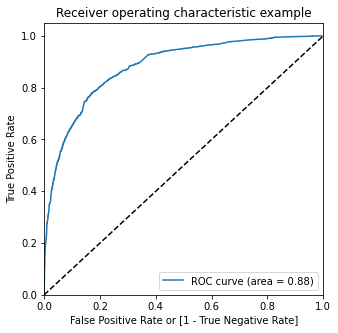

In [97]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The ROC Curve should be a value close to 1. We are getting a good value of 0.97 indicating a good predictive model.

# Finding Optimal Cutoff Point

In [98]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.203132,1871,0,1,1,1,0,0,0,0,0,0,0
1,0,0.229116,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.235047,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.876714,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.093779,3934,0,1,0,0,0,0,0,0,0,0,0


In [99]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.612554  0.966748  0.394303
0.2   0.2  0.739951  0.927818  0.624188
0.3   0.3  0.792362  0.835361  0.765867
0.4   0.4  0.810297  0.774128  0.832584
0.5   0.5  0.806895  0.673560  0.889055
0.6   0.6  0.802257  0.603812  0.924538
0.7   0.7  0.786024  0.519059  0.950525
0.8   0.8  0.760668  0.420114  0.970515
0.9   0.9  0.718151  0.278183  0.989255


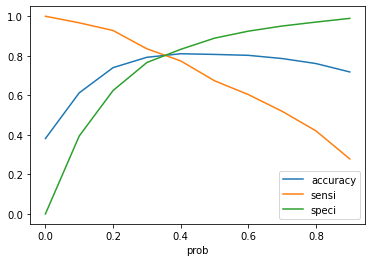

In [100]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [101]:
#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.203132,1871,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.229116,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.235047,3516,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.876714,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.093779,3934,0,1,0,0,0,0,0,0,0,0,0,0


In [102]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.203132,1871,0,20
1,0,0.229116,6795,0,23
2,0,0.235047,3516,0,24
3,0,0.876714,8105,1,88
4,0,0.093779,3934,0,9


In [103]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7923623995052567

In [104]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3065,  937],
       [ 406, 2060]], dtype=int64)

In [105]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [106]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8353609083536091

In [107]:
# Let us calculate specificity
TN / float(TN+FP)

0.7658670664667666

Observation:
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.88, which is  good. We have the following values for the Train Data:

Accuracy : 79%
Sensitivity : 84%
Specificity : 77%
Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

In [108]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.2341329335332334


In [109]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6873540206873541


In [110]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8830308268510516


In [111]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3065,  937],
       [ 406, 2060]], dtype=int64)

In [112]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6873540206873541

In [113]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8353609083536091

In [114]:
from sklearn.metrics import precision_score, recall_score

In [115]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.6873540206873541

In [116]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8353609083536091

In [117]:
from sklearn.metrics import precision_recall_curve

In [118]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

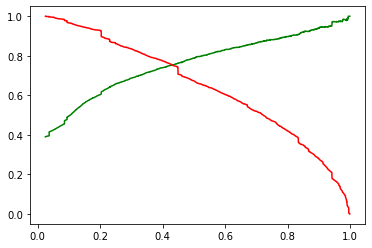

In [119]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [120]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Notable Activity_email bounced,Last Notable Activity_email link clicked,Last Notable Activity_email opened,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed
4269,-0.298654,0.0,1.324501,0.933036,2.660405,-0.032915,0.0,0.0,0.0,-0.018997,...,0,0,0,0,0,0,0,1,0,0
2376,-0.298654,0.0,-0.944318,-0.900812,-1.108316,-0.032915,0.0,0.0,0.0,-0.018997,...,0,0,0,0,0,0,0,1,0,0
7766,-0.298654,0.0,0.473694,-0.793792,1.247135,-0.032915,0.0,0.0,0.0,-0.018997,...,0,0,0,0,0,0,0,0,1,0
9199,-0.298654,0.0,-0.944318,-0.900812,-1.108316,-0.032915,0.0,0.0,0.0,-0.018997,...,0,0,0,0,1,0,0,0,0,0
4359,-0.298654,0.0,-0.944318,-0.900812,-1.108316,-0.032915,0.0,0.0,0.0,-0.018997,...,0,0,1,0,0,0,0,0,0,0


In [121]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_direct traffic,Lead Source_organic search,Lead Source_welingak website,Last Activity_email bounced,Last Activity_sms sent,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,Last Notable Activity_modified,Last Notable Activity_unreachable
4269,0.933036,0,1,0,0,0,1,0,0,0,0,0
2376,-0.900812,1,0,0,0,0,1,0,1,0,0,0
7766,-0.793792,0,0,0,0,0,0,0,0,1,0,1
9199,-0.900812,0,0,0,0,0,0,0,1,0,1,0
4359,-0.900812,1,0,0,0,0,0,0,1,0,0,0


In [122]:
X_test_sm = sm.add_constant(X_test)

# PREDICTIONS ON TEST SET

In [123]:
y_test_pred = res.predict(X_test_sm)

In [124]:
y_test_pred[:10]

4269    0.459784
2376    0.940368
7766    0.949844
9199    0.092523
4359    0.831624
9186    0.700224
1631    0.595807
8963    0.286283
8007    0.063914
5324    0.514674
dtype: float64

In [125]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [126]:
# Let's see the head
y_pred_1.head()

,0
4269,0.459784
2376,0.940368
7766,0.949844
9199,0.092523
4359,0.831624


In [127]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [128]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [129]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [130]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [131]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.459784
1,1,2376,0.940368
2,1,7766,0.949844
3,0,9199,0.092523
4,1,4359,0.831624


In [132]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [133]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,1,4269,0.459784
1,1,2376,0.940368
2,1,7766,0.949844
3,0,9199,0.092523
4,1,4359,0.831624


In [134]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [135]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,4269,1,0.459784,46
1,2376,1,0.940368,94
2,7766,1,0.949844,95
3,9199,0,0.092523,9
4,4359,1,0.831624,83


In [136]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [137]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,4269,1,0.459784,46,1
1,2376,1,0.940368,94,1
2,7766,1,0.949844,95,1
3,9199,0,0.092523,9,0
4,4359,1,0.831624,83,1


In [138]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7954545454545454

In [139]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1289,  388],
       [ 179,  916]], dtype=int64)

In [140]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [141]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8365296803652968

In [142]:
# Let us calculate specificity
TN / float(TN+FP)

0.7686344663088849

In [143]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.7024539877300614

In [144]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8365296803652968

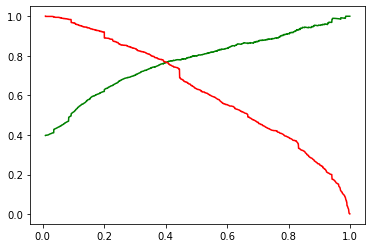

In [145]:
y_pred_final.Converted, y_pred_final.final_Predicted
p, r, thresholds1 = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_prob)
plt.plot(thresholds1, p[:-1], "g-")
plt.plot(thresholds1, r[:-1], "r-")
plt.show()

Observation:
After running the model on the Test Data these are the figures we obtain:

Accuracy : 79%
Sensitivity : 83%
Specificity : 77%

Final Observation:
Let us compare the values obtained for Train & Test:

Train Data: 
Accuracy : 79%
Sensitivity : 84%
Specificity : 77%
    
Test Data: 
Accuracy : 80%
Sensitivity : 83%
Specificity : 77%